---
#### Описание данных


Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.

Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.

---

#### Задание

 - Выявите формулу дохода в целом и его составных частей
 - Проверьте, что данная формула объясняет доход с точностью до рубля
 - Выявите зависимости между составными частями дохода



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

Загрузим и изучим данные

In [2]:
df = pd.read_excel('salary.xlsx', parse_dates=['Месяц'])

In [3]:
df.head(3)

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.0


In [4]:
df.dtypes


FIO                           object
Месяц                 datetime64[ns]
Профессия                     object
Разряд                         int64
Оборудование                  object
Вредность (балл.)              int64
Объем производства             int64
Доход                        float64
dtype: object

In [5]:
df.columns

Index(['FIO', 'Месяц', 'Профессия', 'Разряд', 'Оборудование',
       'Вредность (балл.)', 'Объем производства', 'Доход'],
      dtype='object')

In [6]:
df = df.rename(columns={'FIO': 'name', 
                   'Месяц': 'month', 
                   'Профессия': 'profession', 
                   'Разряд': 'category', 
                   'Оборудование': 'equipment',
                   'Вредность (балл.)': 'harm', 
                   'Объем производства': 'production_volume', 
                   'Доход': 'income'})

In [7]:
df.tail(20)

,name,month,profession,category,equipment,harm,production_volume,income
2380,Щукин К. С.,2009-05-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1250,22698.794118
2381,Щукин К. С.,2009-06-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,950,19661.823529
2382,Щукин К. С.,2009-07-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1400,24217.279412
2383,Щукин К. С.,2009-08-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1180,21990.167647
2384,Щукин К. С.,2009-09-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1080,20977.844118
2385,Щукин К. С.,2009-10-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,780,18649.500000
2386,Щукин К. С.,2009-11-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1020,20370.450000
2387,Щукин К. С.,2009-12-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,810,18649.500000
2388,Яковлев Д. И.,2009-01-01,Подручный вальцовщика,4,Прошивной стан,18,580,18783.000000
2389,Яковлев Д. И.,2009-02-01,Подручный вальцовщика,4,Прошивной стан,18,790,18783.000000


***! Судя по данным, объем производства зависит от месяца, и не зависит от человека***

In [8]:
mean_salary = round(df.income.mean(), 2)
mean_salary

21665.57

In [9]:
median_salary = round(df.income.median(), 2)
median_salary

21057.3

In [10]:
df.income.describe()

count     2400.000000
mean     21665.570570
std       4686.885527
min      12180.000000
25%      18076.500000
50%      21057.300000
75%      25105.764706
max      36076.764706
Name: income, dtype: float64

In [11]:
df.profession.unique()

array(['Уборщик', 'Вальцовщик', 'Нагревальщик металла',
       'Оператор поста управления',
       'Контролер качества готовой продукции', 'Подручный вальцовщика',
       'Резчик горячего металла', 'Посадчик металла', 'Огнеупорщик'],
      dtype=object)

In [12]:
df.equipment.unique()

array(['Пилигримовые станы', 'Нагревательные печи',
       'Нагревательные печи, кантовка', 'Калибровочный стан',
       'Контрольно-измерительная аппаратура', 'Калибровочный стан, ГРП',
       'Прошивной стан', 'Нагревательные печи, нагрев',
       'Вспомогательные помещения'], dtype=object)

Посмотрим на количество уникальных значений для всех колонок

In [13]:
df.nunique()

name                 200
month                 12
profession             9
category               5
equipment              9
harm                   6
production_volume     12
income               346
dtype: int64

**Работает всего 200 человек, у них 9 профессий, 9 видов оборудования**

Посмотрим распределение доходов

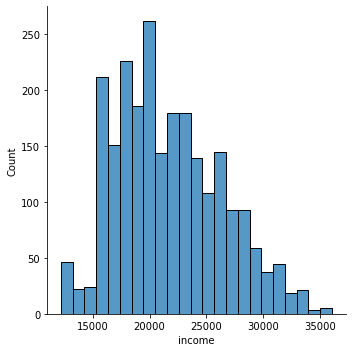

In [14]:
ax = sns.displot(df.income, kde=False)

Посмотрим распределение ЗП по профессиям

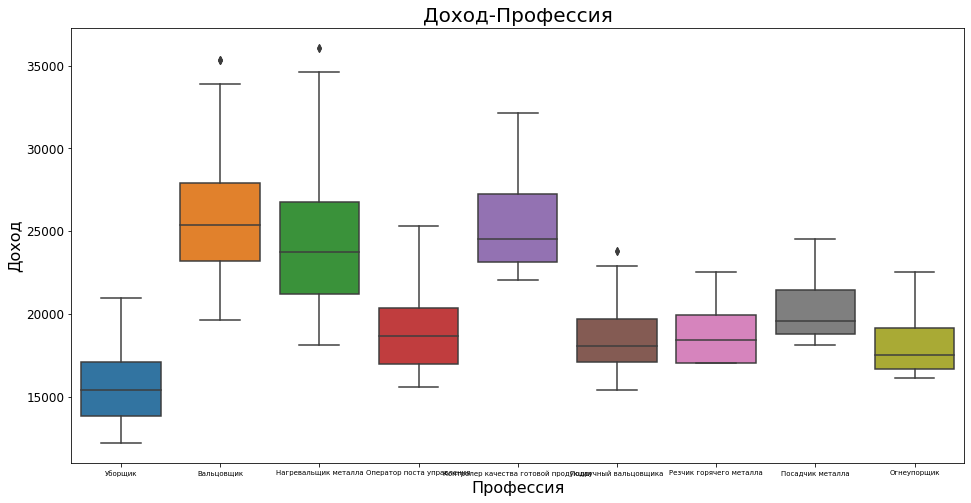

In [15]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='profession', y='income', data=df)

plt.title('Доход-Профессия', fontsize=20)
plt.ylabel('Доход', fontsize=16)
plt.xlabel('Профессия', fontsize=16)

plt.xticks(fontsize=7)
plt.yticks(fontsize=12);

Посмотрим значения медианных зарплат по профессиям

In [16]:
df.groupby('profession', as_index=False) \
    .agg({'income': 'median'})

,profession,income
0,Вальцовщик,25392.705882
1,Контролер качества готовой продукции,24525.529412
2,Нагревальщик металла,23724.411765
3,Огнеупорщик,17523.000000
4,Оператор поста управления,18649.500000
5,Подручный вальцовщика,18076.500000
6,Посадчик металла,19586.117647
7,Резчик горячего металла,18423.000000
8,Уборщик,15420.000000


Больше  всего получают Вальцовщики, но единичные выбросы есть у Нагревальщиков металла

Можно сгруппировать еще по месяцам, т к отличались объемы производства по месяца

Проверим, верно ли что объем производства не зависит от человека, а зависит только от месяца

In [17]:
df.groupby('month', as_index=False) \
    .agg({'production_volume': 'mean'})

,month,production_volume
0,2009-01-01,580.0
1,2009-02-01,790.0
2,2009-03-01,820.0
3,2009-04-01,1200.0
4,2009-05-01,1250.0
5,2009-06-01,950.0
6,2009-07-01,1400.0
7,2009-08-01,1180.0
8,2009-09-01,1080.0
9,2009-10-01,780.0


In [18]:
df.groupby('month', as_index=False) \
    .agg({'production_volume': 'min'})

,month,production_volume
0,2009-01-01,580
1,2009-02-01,790
2,2009-03-01,820
3,2009-04-01,1200
4,2009-05-01,1250
5,2009-06-01,950
6,2009-07-01,1400
7,2009-08-01,1180
8,2009-09-01,1080
9,2009-10-01,780


**!верно ли что объем производства не зависит от человека, а зависит только от месяца*

Посмотрим средние зарплаты по месяцам

In [19]:
df.groupby('month', as_index=False) \
    .agg({'income': 'mean'})

,month,income
0,2009-01-01,19885.912500
1,2009-02-01,19885.912500
2,2009-03-01,19885.912500
3,2009-04-01,23395.097426
4,2009-05-01,23896.409559
5,2009-06-01,20888.536765
6,2009-07-01,25400.345956
7,2009-08-01,23194.572574
8,2009-09-01,22191.948309
9,2009-10-01,19885.912500


**! Чем больше объем производства, тем выше общий доход**

Посмотрим какая профессия самая распрастраненная 

In [20]:
df['profession'].value_counts() / 12 # делим на 12, чтоб люди не повторялись т к данные за 12 мес

Вальцовщик                              51.0
Нагревальщик металла                    42.0
Подручный вальцовщика                   30.0
Оператор поста управления               27.0
Уборщик                                 21.0
Контролер качества готовой продукции     9.0
Посадчик металла                         8.0
Резчик горячего металла                  7.0
Огнеупорщик                              5.0
Name: profession, dtype: float64

Больше всего Вальцовщиков

Теперь посмотрим зависимость дохода от разряда

In [21]:
df.groupby(['category', 'profession'], as_index=False) \
    .agg({'income': 'mean'}) \
    .sort_values('income')

,category,profession,income
1,3,Уборщик,15559.387395
4,4,Оператор поста управления,17225.399830
0,3,Подручный вальцовщика,17268.238235
3,4,Огнеупорщик,18053.498382
7,4,Резчик горячего металла,18708.271639
5,4,Подручный вальцовщика,19479.305101
2,4,Нагревальщик металла,20011.205042
6,4,Посадчик металла,20150.538419
10,5,Оператор поста управления,20511.021796
8,5,Вальцовщик,21793.841544


**! Доход тем выше, чем выше разряд внутри профессии, но и в целом тенденция такая же**

Посмотрим по разрядам без учета профессии

In [22]:
df.groupby('category', as_index=False) \
    .agg({'income': 'mean'}) \
    .sort_values('income')

,category,income
0,3,16242.927731
1,4,18894.771704
2,5,21687.454268
3,6,25208.128529
4,7,27923.024923


**! Доход тем выше, чем выше разряд в целом**

Посмотрим зависимость дохода от используемого оборудования

In [23]:
df.groupby('equipment', as_index=False) \
    .agg({'income': 'mean'}) \
    .sort_values('income')

,equipment,income
0,Вспомогательные помещения,13750.662745
1,Калибровочный стан,19501.114255
2,"Калибровочный стан, ГРП",20748.062745
7,Пилигримовые станы,20758.343058
5,"Нагревательные печи, кантовка",22400.708364
6,"Нагревательные печи, нагрев",22765.248611
4,Нагревательные печи,23348.397620
8,Прошивной стан,24441.357021
3,Контрольно-измерительная аппаратура,25175.434314


**! Тут представлено оборудование в порядке возрастания дохода работающих на нем, меньше всего получают, те, кто работает в вспомогательных помещениях, больше всего те, кто на КИА**

Посмотри зависимость дохода от вредности производства

In [24]:
df.groupby('harm', as_index=False) \
    .agg({'income': 'mean'}) \
    .sort_values('harm')

,harm,income
0,0,19463.048529
1,8,18929.055664
2,11,18053.498382
3,16,18708.271639
4,18,22251.664753
5,22,23621.290441


**! доход не имеет прямой зависимости от числа, соответсвующего вредности, только после числа 11 появляется иакая зависимость**

Посмотрим какие профессии работают при каких уровнях вредности

In [25]:
df.query('harm == 0').profession.unique()

array(['Контролер качества готовой продукции', 'Уборщик'], dtype=object)

In [26]:
df.query('harm == 8').profession.unique()

array(['Оператор поста управления'], dtype=object)

In [27]:
df.query('harm == 11').profession.unique()

array(['Огнеупорщик'], dtype=object)

In [28]:
df.query('harm == 16').profession.unique()

array(['Резчик горячего металла'], dtype=object)

In [29]:
df.query('harm == 18').profession.unique()

array(['Уборщик', 'Вальцовщик', 'Подручный вальцовщика'], dtype=object)

In [30]:
df.query('harm == 22').profession.unique()

array(['Нагревальщик металла', 'Посадчик металла'], dtype=object)

Распределение доходов нелинейно от степени вредности, тк не все професси представлены на каждом уровне вредности

**У Контролеров качества готовой продукции всегда уровень вредности 0, а у Нагревальщика металла и Посадчика металла всегда максимальный 22 уровень вредности**

In [31]:
df.groupby('profession', as_index=False) \
    .agg({'income': 'min'})

,profession,income
0,Вальцовщик,19630.0
1,Контролер качества готовой продукции,22060.0
2,Нагревальщик металла,18090.0
3,Огнеупорщик,16110.0
4,Оператор поста управления,15570.0
5,Подручный вальцовщика,15420.0
6,Посадчик металла,18090.0
7,Резчик горячего металла,17010.0
8,Уборщик,12180.0



---

Посмотрим кто и с какими условиями получает мин зарплату

In [32]:
df.query('income == 12180.0')

,name,month,profession,category,equipment,harm,production_volume,income
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0
469,Григорьев А. Т.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.0
470,Григорьев А. Т.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.0
477,Григорьев А. Т.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.0
479,Григорьев А. Т.,2009-12-01,Уборщик,3,Вспомогательные помещения,0,810,12180.0
612,Журавлев Б. И.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0
613,Журавлев Б. И.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.0
614,Журавлев Б. И.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.0
621,Журавлев Б. И.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.0
623,Журавлев Б. И.,2009-12-01,Уборщик,3,Вспомогательные помещения,0,810,12180.0


**! Минимальную зарплату получают уборщики, с уровнем вредности 0, категорией 3, рабтающие во вспомогательных помещениях, и только в январе, феврале, марте, октябре, декабре**

Посмотрим, как меняются зарплаты у других сотрудников, с такими же условиями работы

In [33]:
df.query('category == 3 and harm == 0').head(20)

,name,month,profession,category,equipment,harm,production_volume,income
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.000000
469,Григорьев А. Т.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.000000
470,Григорьев А. Т.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.000000
471,Григорьев А. Т.,2009-04-01,Уборщик,3,Вспомогательные помещения,0,1200,14687.647059
472,Григорьев А. Т.,2009-05-01,Уборщик,3,Вспомогательные помещения,0,1250,15045.882353
473,Григорьев А. Т.,2009-06-01,Уборщик,3,Вспомогательные помещения,0,950,12896.470588
474,Григорьев А. Т.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16120.588235
475,Григорьев А. Т.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
476,Григорьев А. Т.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
477,Григорьев А. Т.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000


**! Из данных видно, что пока объем производства не достигнет какого то порогового значения, надбавка не устанавливается**

Надбавки нет при Объеме производства 580, 780, 790, 810, 820, при 950 она уже есть. Соответственно план производства находится между числами 820 и 950

Попробуем установить эту доплату и пороговое значение

Для этого будем разность дохода делить на разность плана

In [34]:
(15045.88 - 14687.65) / 50

7.164599999999991

теперь надо найти такую величину плана чтобы выполнялось условие:

(12896.47 - 12180) / (950 - x) = 7.164599999999991

In [35]:
x = 950 - (12896.47 - 12180) / 7.164599999999991

In [36]:
round(x)

850

Кажется, план производства, после которого начинаются доп выплаты, это 850. Проверим на других должностях

In [37]:
df.query('profession == "Огнеупорщик"').head(20)

,name,month,profession,category,equipment,harm,production_volume,income
672,Иванов П. А.,2009-01-01,Огнеупорщик,4,Нагревательные печи,11,580,17523.000000
673,Иванов П. А.,2009-02-01,Огнеупорщик,4,Нагревательные печи,11,790,17523.000000
674,Иванов П. А.,2009-03-01,Огнеупорщик,4,Нагревательные печи,11,820,17523.000000
675,Иванов П. А.,2009-04-01,Огнеупорщик,4,Нагревательные печи,11,1200,20723.029412
676,Иванов П. А.,2009-05-01,Огнеупорщик,4,Нагревательные печи,11,1250,21180.176471
677,Иванов П. А.,2009-06-01,Огнеупорщик,4,Нагревательные печи,11,950,18437.294118
678,Иванов П. А.,2009-07-01,Огнеупорщик,4,Нагревательные печи,11,1400,22551.617647
679,Иванов П. А.,2009-08-01,Огнеупорщик,4,Нагревательные печи,11,1180,20540.170588
680,Иванов П. А.,2009-09-01,Огнеупорщик,4,Нагревательные печи,11,1080,19625.876471
681,Иванов П. А.,2009-10-01,Огнеупорщик,4,Нагревательные печи,11,780,17523.000000


In [38]:
int((21180.18 - 20723.03) / (1250 - 1200)) == int((18437.29 - 17523) / (950 - 850))

True

Проверка выполняется, int нужен, тк из за округления какие то знаки после запятной могут не совпадать

В таблицу добавим величину перевыполнения плана, если план недовыполнен примем ее за 0

In [39]:
def over(s):
    l = []
    for i in s:
        if i > 850:
            a = (i - 850)
        else:
            a = 0
        l.append(a)
    return l
df['over_production_volume'] = over(df.production_volume)

In [40]:
df.head(10)

,name,month,profession,category,equipment,harm,production_volume,income,over_production_volume
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,350
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,400
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647,100
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,550
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235,330
8,Абрамов Е. Д.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,18450.670588,230
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.000000,0


**! Для каждой специальности своя доплата за перевыполнение плана**

In [41]:
df.groupby(['category', 'profession']) \
    .agg({'income': 'mean'})

income
category profession                                        
3        Подручный вальцовщика                 17268.238235
         Уборщик                               15559.387395
4        Нагревальщик металла                  20011.205042
         Огнеупорщик                           18053.498382
         Оператор поста управления             17225.399830
         Подручный вальцовщика                 19479.305101
         Посадчик металла                      20150.538419
         Резчик горячего металла               18708.271639
5        Вальцовщик                            21793.841544
         Нагревальщик металла                  22593.700260
         Оператор поста управления             20511.021796
6        Вальцовщик                            25105.244519
         Нагревальщик металла                  25491.059559
7        Вальцовщик                            28565.033669
         Контролер качества готовой продукции  25175.434314
         Нагревальщик металла                  29176.039853

Больше всего различий в разрядах у Вальцовщиков, они есть  5, 6 и 7 разряда, для этого возьмем только тех Вальцовщиков, кто не перевыполнил план

In [42]:
df.query('profession == "Вальцовщик" and over_production_volume == 0').head(10)

,name,month,profession,category,equipment,harm,production_volume,income,over_production_volume
24,Агафонов С. И.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,22260.0,0
25,Агафонов С. И.,2009-02-01,Вальцовщик,6,Пилигримовые станы,18,790,22260.0,0
26,Агафонов С. И.,2009-03-01,Вальцовщик,6,Пилигримовые станы,18,820,22260.0,0
33,Агафонов С. И.,2009-10-01,Вальцовщик,6,Пилигримовые станы,18,780,22260.0,0
35,Агафонов С. И.,2009-12-01,Вальцовщик,6,Пилигримовые станы,18,810,22260.0,0
72,Андреев Е. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5,0
73,Андреев Е. А.,2009-02-01,Вальцовщик,5,Калибровочный стан,18,790,20449.5,0
74,Андреев Е. А.,2009-03-01,Вальцовщик,5,Калибровочный стан,18,820,20449.5,0
81,Андреев Е. А.,2009-10-01,Вальцовщик,5,Калибровочный стан,18,780,20449.5,0
83,Андреев Е. А.,2009-12-01,Вальцовщик,5,Калибровочный стан,18,810,20449.5,0


**! Видим, что при одинаковых условиях, при одинаковой должности, при одинаковом разряде, оборудовании, вредности, выполнении плана, два человека получают разные доходы(например, в январе Агафонов С. И. и Белоусов М. Д. получили разные доходы**